In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

path = 'cleaned/train.csv'
df = pd.read_csv(path)

In [2]:
df.describe()

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,...,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,80631.500000,25982.666640,4.500000,33.316340,5.004617e+08,50505.123449,4197.270835,5.368820,5.533570,14.53208,...,21.08141,13.313120,10.470323,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586
std,43301.486619,14340.543051,2.291299,10.764812,2.908267e+08,38299.422093,3186.432497,2.593314,2.067098,8.74133,...,14.80456,6.237166,6.609481,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719
min,5634.000000,1006.000000,1.000000,14.000000,8.134900e+04,7005.930000,303.645417,0.000000,0.000000,1.00000,...,0.00000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,43132.750000,13664.500000,2.750000,24.000000,2.451686e+08,19342.972500,1626.594167,3.000000,4.000000,7.00000,...,10.00000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983
50%,80631.500000,25777.000000,4.500000,33.000000,5.006886e+08,36999.705000,3095.905000,5.000000,5.000000,13.00000,...,18.00000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366
75%,118130.250000,38385.000000,6.250000,42.000000,7.560027e+08,71683.470000,5957.715000,7.000000,7.000000,20.00000,...,28.00000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683
max,155629.000000,50999.000000,8.000000,56.000000,9.999934e+08,179987.280000,15204.633333,11.000000,11.000000,34.00000,...,62.00000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696


In [3]:
# Remove Columns that will not be used for classification
d_col=['ID','Customer_ID','Month','Name','SSN','Monthly_Inhand_Salary']

for _ in d_col:
    if _ in df.columns:
        df=df.drop(_, axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       100000 non-null  float64
 1   Occupation                100000 non-null  object 
 2   Annual_Income             100000 non-null  float64
 3   Num_Bank_Accounts         100000 non-null  float64
 4   Num_Credit_Card           100000 non-null  float64
 5   Interest_Rate             100000 non-null  float64
 6   Num_of_Loan               100000 non-null  float64
 7   Type_of_Loan              100000 non-null  object 
 8   Delay_from_due_date       100000 non-null  float64
 9   Num_of_Delayed_Payment    100000 non-null  float64
 10  Changed_Credit_Limit      100000 non-null  float64
 11  Num_Credit_Inquiries      100000 non-null  float64
 12  Credit_Mix                100000 non-null  object 
 13  Outstanding_Debt          100000 non-null  fl

In [4]:
# See Nominal values
for col in df:
    if (df[col].dtypes == object): 
        print(col)
        print("**"*20)        
        print(df[col].value_counts(dropna=False))
        print("**"*20)

Occupation
****************************************
Lawyer           7096
Engineer         6864
Architect        6824
Mechanic         6776
Scientist        6744
Accountant       6744
Developer        6720
Media_Manager    6720
Teacher          6672
Entrepreneur     6648
Doctor           6568
Journalist       6536
Manager          6432
Musician         6352
Writer           6304
Name: Occupation, dtype: int64
****************************************
Type_of_Loan
****************************************
No Data                                                                                                                     11408
not specified                                                                                                                1408
credit-builder loan                                                                                                          1280
personal loan                                                                                         

In [5]:
df['Credit_Score']

0            Good
1            Good
2            Good
3            Good
4            Good
           ...   
99995        Poor
99996        Poor
99997        Poor
99998    Standard
99999        Poor
Name: Credit_Score, Length: 100000, dtype: object

In [6]:
# Conversion of Nominal data into Numeric
y_, label = pd.factorize(df["Credit_Score"])
df[df.select_dtypes(['object']).columns]= df[df.select_dtypes(['object']).columns].apply(lambda x: pd.factorize(x)[0])

In [7]:
print(y_)

[0 0 0 ... 2 1 2]


In [8]:
print(label)

Index(['Good', 'Standard', 'Poor'], dtype='object')


In [9]:
df.describe()

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.00000,100000.00000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000
mean,33.316340,6.95288,50505.123449,5.368820,5.533570,14.53208,3.532880,1830.14888,21.08141,13.313120,...,0.933840,1426.220376,32.285173,221.220460,1.166590,107.699208,55.101315,2.753640,392.697586,1.11170
std,10.764812,4.32355,38299.422093,2.593314,2.067098,8.74133,2.446356,1944.39364,14.80456,6.237166,...,0.732904,1155.129026,5.116875,99.680716,0.923139,132.267056,39.006932,1.548106,201.652719,0.67512
min,14.000000,0.00000,7005.930000,0.000000,0.000000,1.00000,0.000000,0.00000,0.00000,0.000000,...,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.007760,0.00000
25%,24.000000,3.00000,19342.972500,3.000000,4.000000,7.00000,2.000000,109.75000,10.00000,9.000000,...,0.000000,566.072500,28.052567,144.000000,0.000000,29.268886,27.959111,2.000000,267.615983,1.00000
50%,33.000000,7.00000,36999.705000,5.000000,5.000000,13.00000,3.000000,1035.00000,18.00000,14.000000,...,1.000000,1166.155000,32.305784,219.000000,2.000000,66.462304,45.156550,3.000000,333.865366,1.00000
75%,42.000000,11.00000,71683.470000,7.000000,7.000000,20.00000,5.000000,3319.25000,28.00000,18.000000,...,1.000000,1945.962500,36.496663,302.000000,2.000000,147.392573,71.295797,4.000000,463.215683,2.00000
max,56.000000,14.00000,179987.280000,11.000000,11.000000,34.00000,9.000000,6260.00000,62.00000,25.000000,...,2.000000,4998.070000,50.000000,404.000000,2.000000,1779.103254,434.191089,5.000000,1183.930696,2.00000


In [10]:
# finding Columns with Outliers using IQR method
def find_outliers(df,threshold=1.5):
    cols=[]
    
    for _ in df.columns:
        q1 = np.percentile(df[_], 25)
        q3 = np.percentile(df[_], 75)
        iqr = q3 - q1
        lower_limit = q1 - threshold * iqr
        upper_limit = q3 + threshold * iqr
        
        if any((df[_] < lower_limit) | (df[_] > upper_limit)):
            cols.append(_)
    return cols

outlier_columns = find_outliers(df)
print(outlier_columns)

['Annual_Income', 'Delay_from_due_date', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']


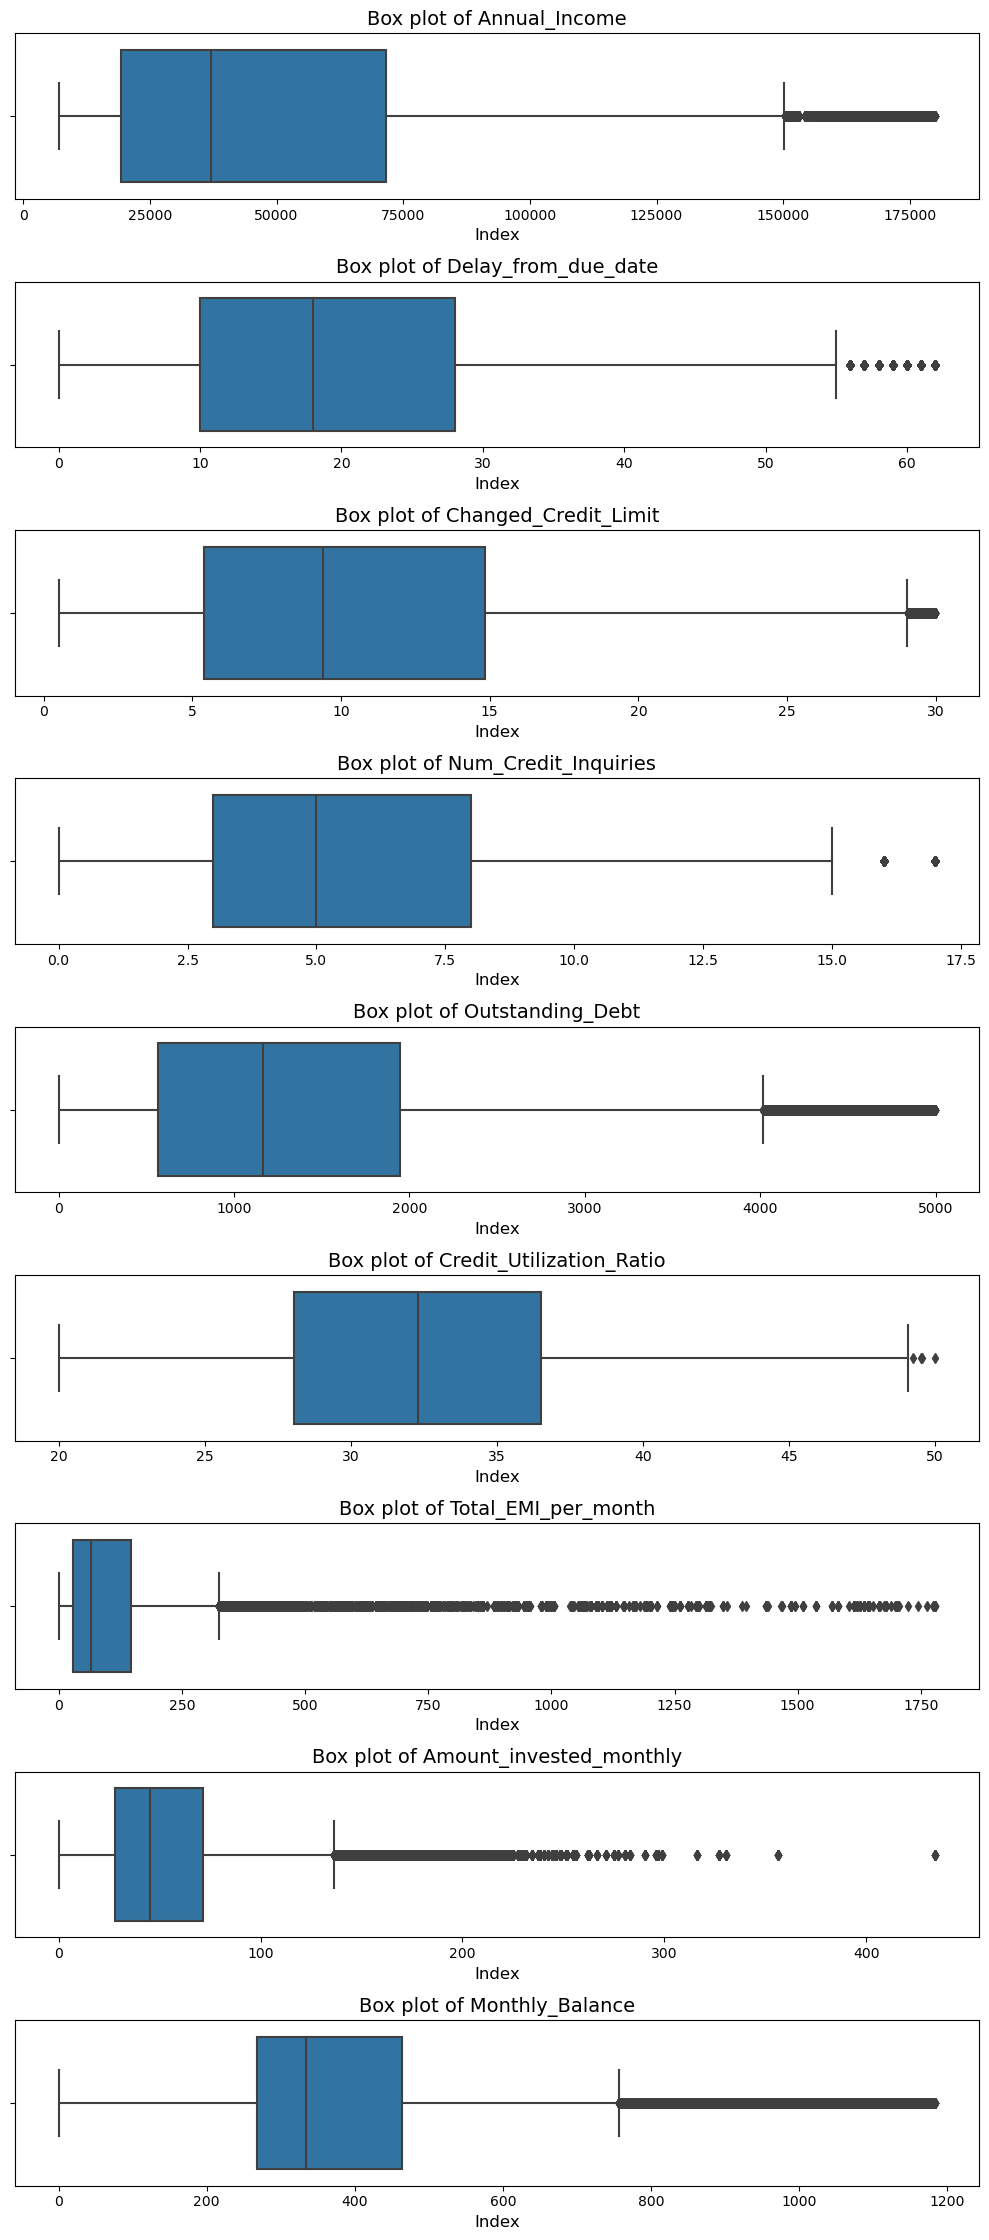

In [11]:
fig, axes = plt.subplots(nrows=len(outlier_columns), ncols=1, figsize=(10, 2.5 * len(outlier_columns)))

for i, column in enumerate(outlier_columns):
    ax = axes[i]
    sns.boxplot(x=df[column], ax=ax)
    ax.set_xlabel('Index', fontsize=12)
    ax.set_title(f'Box plot of {column}', fontsize=14)
plt.savefig('outlier_box.png', dpi=300)
plt.tight_layout()
plt.show()

In [12]:
# Limit the Outliers to Upper limit and Lower Limit
threshold= 1.5
df2 = df.copy()
for col in outlier_columns:
    q1 = np.percentile(df[col], 25)
    q3 = np.percentile(df[col], 75)
    iqr = q3 - q1
    lower_limit = q1 - threshold * iqr
    upper_limit = q3 + threshold * iqr
        
    df2[col] = np.where(df[col]>upper_limit, upper_limit,
                 np.where(df[col]<lower_limit, lower_limit, df[col]))

In [13]:
'''for _ in outlier_columns:
    Q1 = df[_].quantile(0.25)
    Q3 = df[_].quantile(0.75)
    IQR = Q3 - Q1
    df = df.drop(df.loc[df[_] > (Q3 + 1.5 * IQR)].index)
    df = df.drop(df.loc[df[_] < (Q1 - 1.5 * IQR)].index)
df.info()'''

'for _ in outlier_columns:\n    Q1 = df[_].quantile(0.25)\n    Q3 = df[_].quantile(0.75)\n    IQR = Q3 - Q1\n    df = df.drop(df.loc[df[_] > (Q3 + 1.5 * IQR)].index)\n    df = df.drop(df.loc[df[_] < (Q1 - 1.5 * IQR)].index)\ndf.info()'

In [14]:
df['Annual_Income']

0        19114.12
1        19114.12
2        19114.12
3        19114.12
4        19114.12
           ...   
99995    39628.99
99996    39628.99
99997    39628.99
99998    39628.99
99999    39628.99
Name: Annual_Income, Length: 100000, dtype: float64

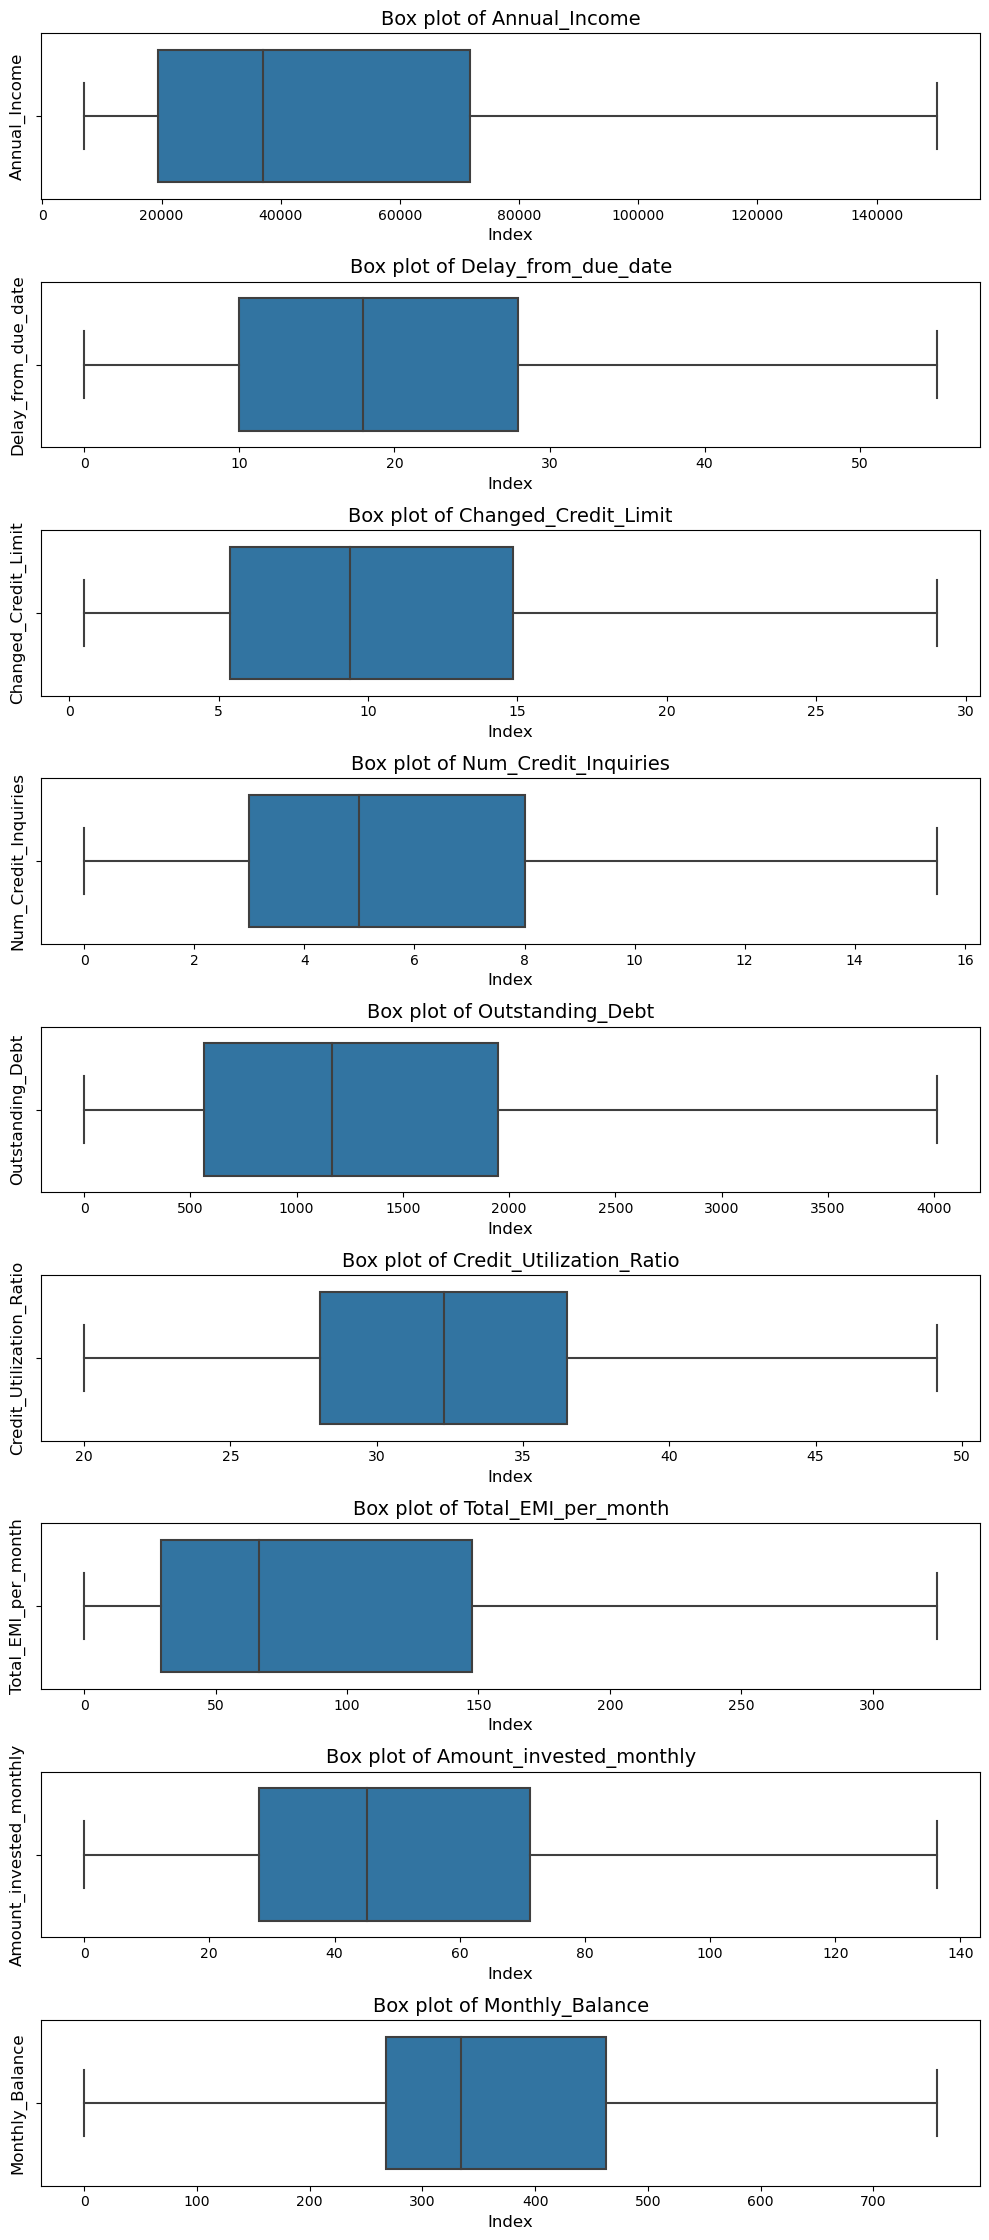

In [15]:
# Box plot after handeling outliers
fig, axes = plt.subplots(nrows=len(outlier_columns), ncols=1, figsize=(10, 2.5 * len(outlier_columns)))

for i, column in enumerate(outlier_columns):
    ax = axes[i]
    sns.boxplot(x=df2[column], ax=ax)
    ax.set_xlabel('Index', fontsize=12)
    ax.set_ylabel(column, fontsize=12)
    ax.set_title(f'Box plot of {column}', fontsize=14)

plt.tight_layout()
plt.show()

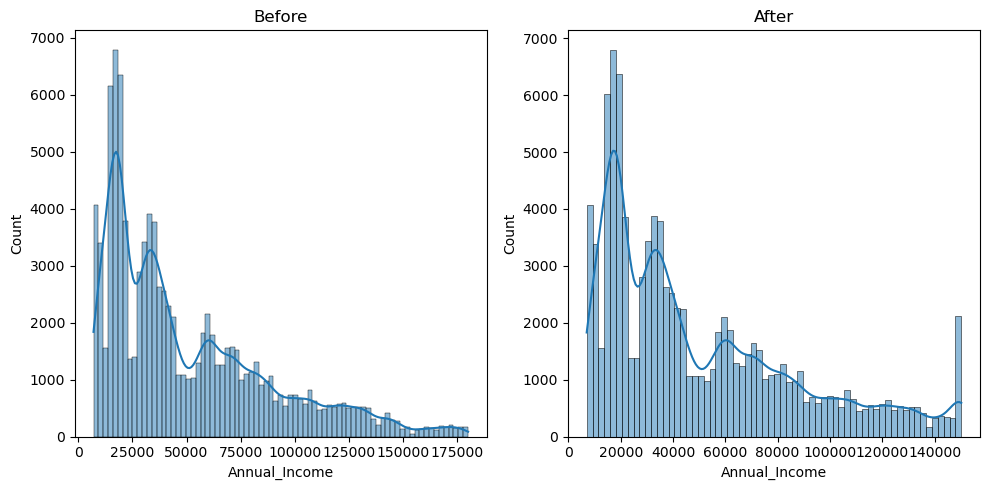

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot "Before" distribution
sns.histplot(df['Annual_Income'], kde=True, ax=axes[0])
axes[0].set_title('Before')

# Plot "After" distribution
sns.histplot(df2['Annual_Income'], kde=True, ax=axes[1])
axes[1].set_title('After')

plt.tight_layout()
plt.savefig('limit.png', dpi=300)

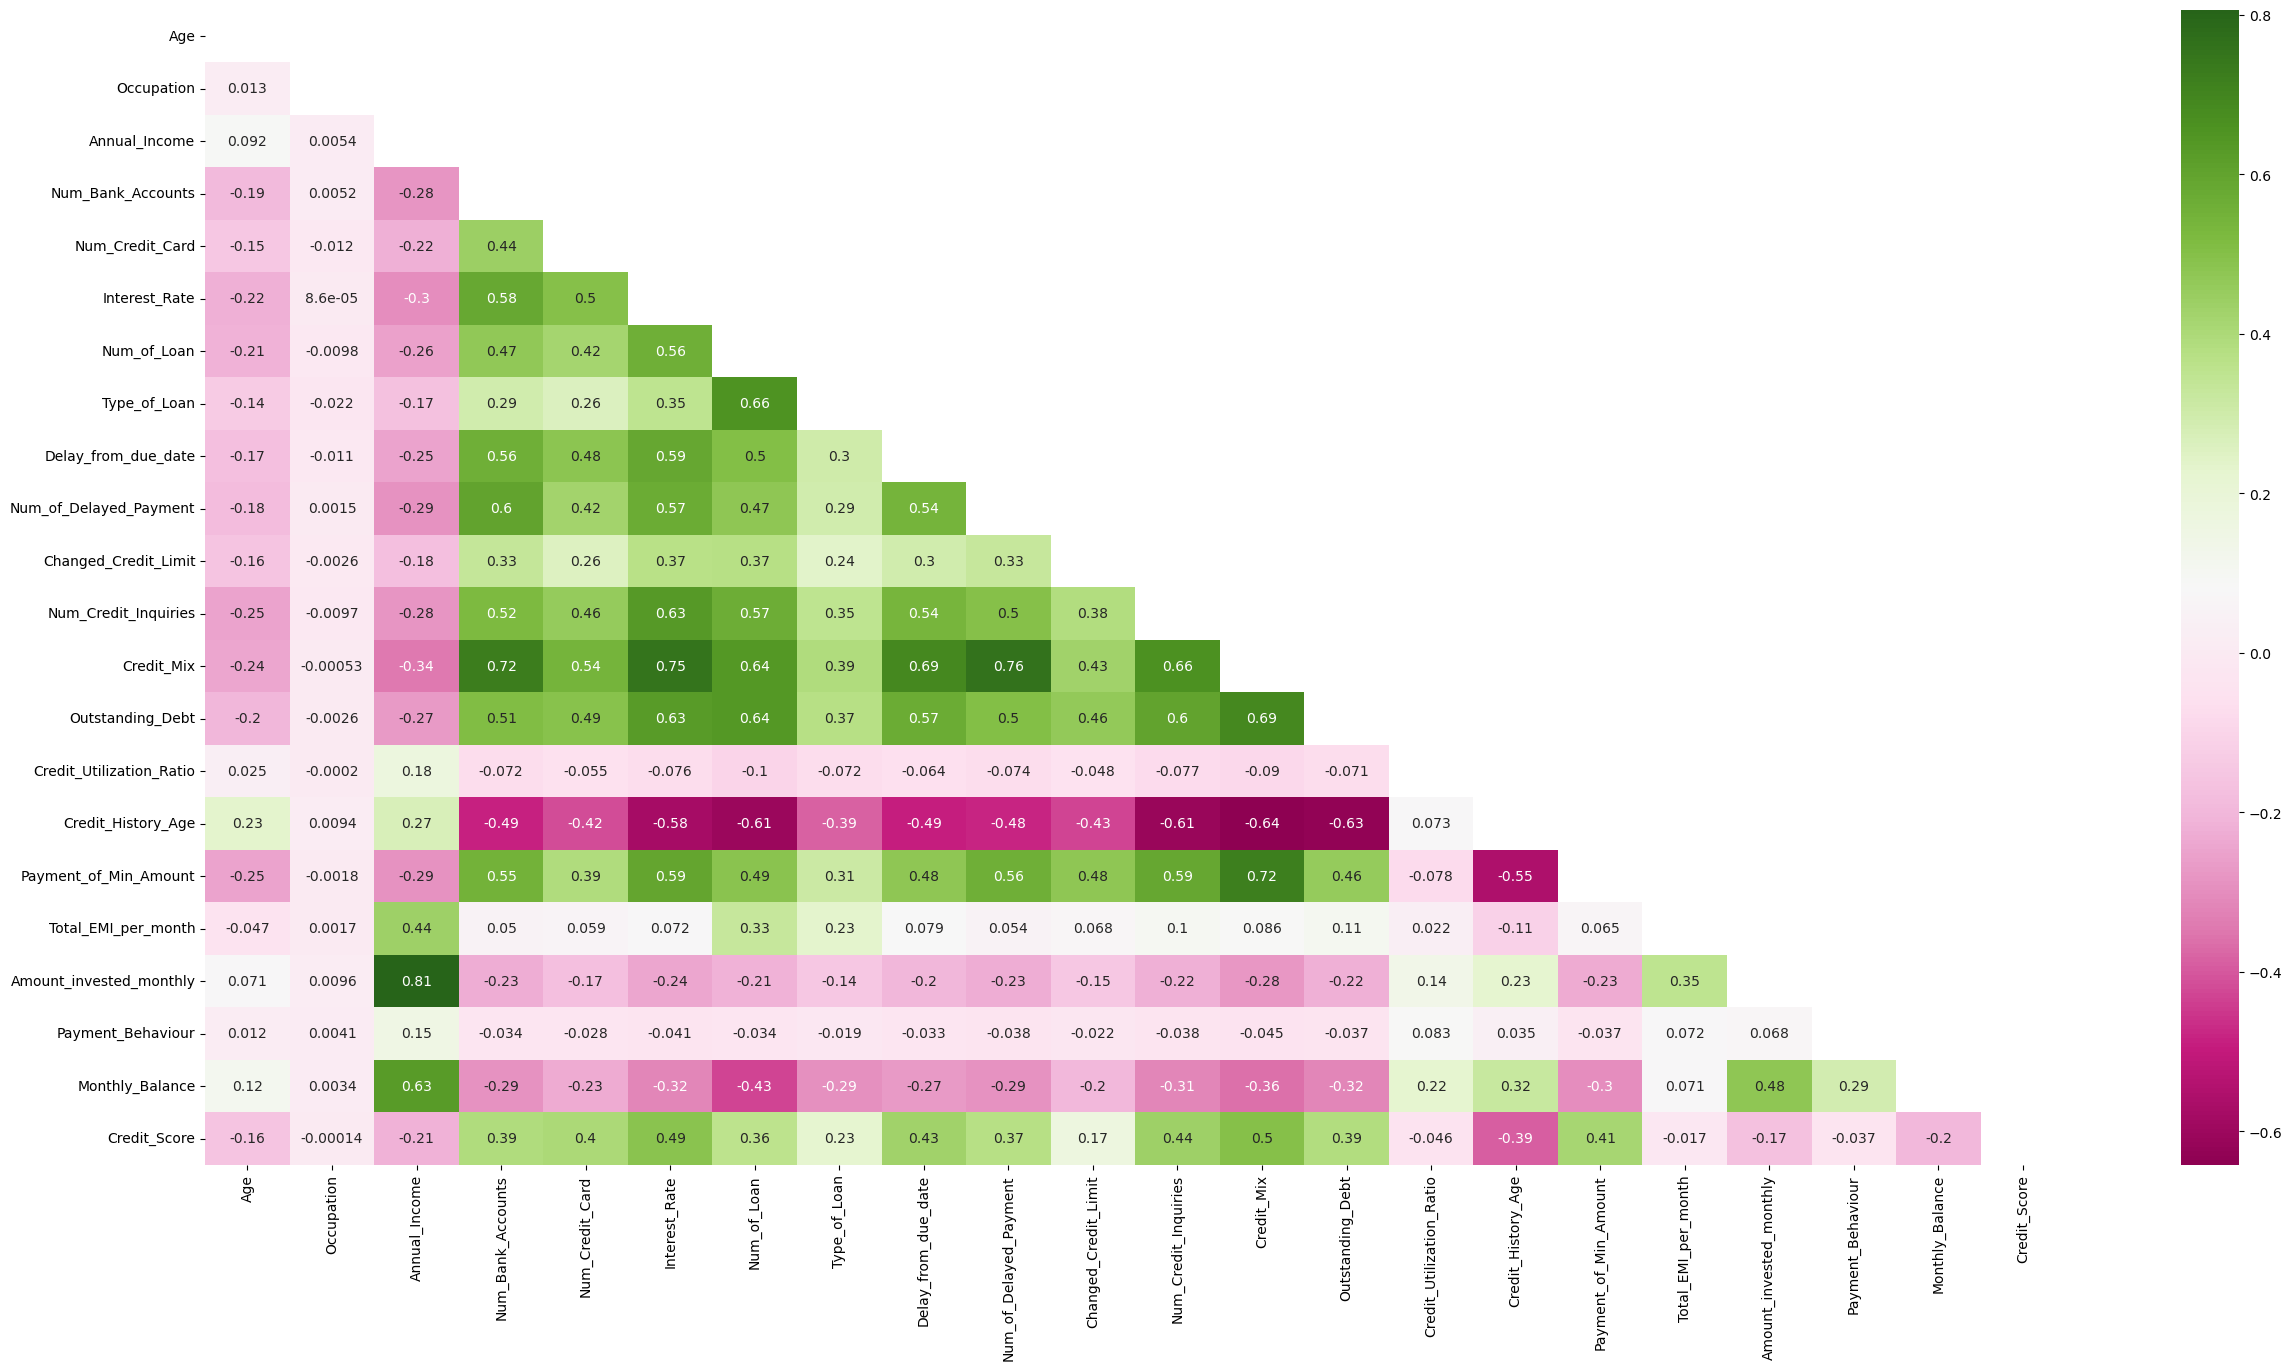

In [17]:
corr= df.corr()

plt.figure(figsize=(30,15))
matrix = np.triu(corr)
sns.heatmap(corr,cmap="PiYG",annot=True,mask=matrix)
plt.savefig('matrix.png', dpi=300)

In [18]:
# Training Data
y = df['Credit_Score']
X = df.drop('Credit_Score',axis=1)

In [19]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(criterion='entropy')

In [20]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=100)

In [21]:
clf = clf.fit(X_train,y_train)

In [22]:
predicted = clf.predict(X_test)
pred_label = label[predicted]
y_label = label[y_test]

In [23]:
print(pred_label)

Index(['Standard', 'Standard', 'Standard', 'Standard', 'Poor', 'Standard',
       'Poor', 'Standard', 'Standard', 'Standard',
       ...
       'Standard', 'Poor', 'Standard', 'Poor', 'Standard', 'Standard',
       'Standard', 'Poor', 'Good', 'Poor'],
      dtype='object', length=33000)


In [27]:
print(y_label)

Index(['Standard', 'Standard', 'Poor', 'Standard', 'Poor', 'Standard', 'Poor',
       'Standard', 'Standard', 'Standard',
       ...
       'Standard', 'Poor', 'Standard', 'Standard', 'Good', 'Standard',
       'Standard', 'Poor', 'Standard', 'Poor'],
      dtype='object', length=33000)


/var/folders/64/glc9pwv906qgcq3vds_5pvv40000gn/T/ipykernel_42920/988786826.py:10: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  C=conf_mat / conf_mat.astype(np.float).sum(axis=1)


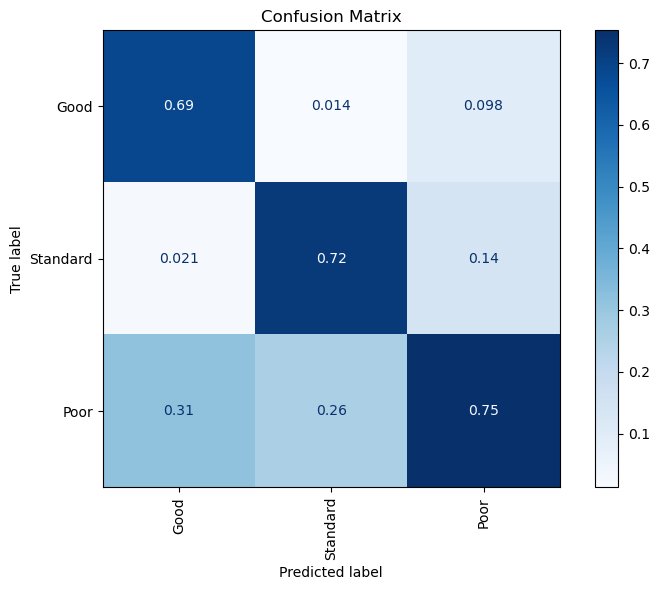

In [34]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    classification_report,
)

conf_mat = confusion_matrix(y_label,pred_label)
C=conf_mat / conf_mat.astype(np.float).sum(axis=1)
disp = ConfusionMatrixDisplay(confusion_matrix=C, display_labels=label)
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax, cmap='Blues', xticks_rotation='vertical')

plt.title('Confusion Matrix')
plt.tight_layout()

plt.savefig('entropy.png', dpi=300)

In [35]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.67      0.69      0.68      5864
           1       0.76      0.75      0.75     17529
           2       0.73      0.72      0.73      9607

    accuracy                           0.73     33000
   macro avg       0.72      0.72      0.72     33000
weighted avg       0.73      0.73      0.73     33000



In [36]:

clf_gini = tree.DecisionTreeClassifier(criterion='gini', random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [37]:
y_pred_gini = clf_gini.predict(X_test)

/var/folders/64/glc9pwv906qgcq3vds_5pvv40000gn/T/ipykernel_42920/1011714517.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  C=conf_mat / conf_mat.astype(np.float).sum(axis=1)


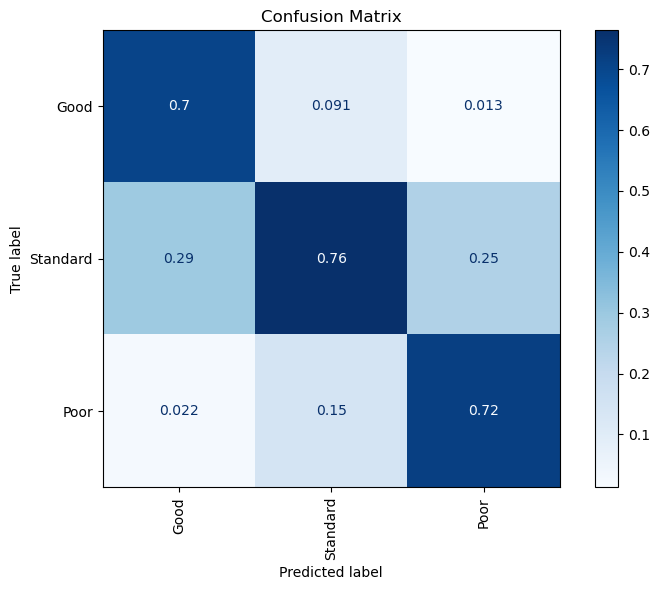

In [40]:
conf_mat = confusion_matrix(y_test,y_pred_gini)
C=conf_mat / conf_mat.astype(np.float).sum(axis=1)
disp = ConfusionMatrixDisplay(confusion_matrix=C, display_labels=label)
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax, cmap='Blues', xticks_rotation='vertical')

plt.title('Confusion Matrix')
plt.tight_layout()

plt.savefig('entropy2.png', dpi=300)

In [39]:
print(classification_report(y_test,y_pred_gini))

              precision    recall  f1-score   support

           0       0.69      0.70      0.70      5864
           1       0.76      0.76      0.76     17529
           2       0.73      0.72      0.72      9607

    accuracy                           0.74     33000
   macro avg       0.73      0.73      0.73     33000
weighted avg       0.74      0.74      0.74     33000

